In [41]:
import pandas as pd
import re
import os
import glob
import snapatac2 as snap

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils
import subprocess

In [43]:
method = 'mementoht'

In [44]:
def merge_region(region='PFC',condition="MC",folder='/data2st1/junyi/output/atac0416/dar/region_nt/',method='mementob',blacklist=['Doublet','NN',"Neuron"]):
    df_result = pd.DataFrame()
    files = glob.glob(f'{folder}/{region}*{condition}_{method}.csv')
    for file in files:
        if any([file.find(black) > -1 for black in blacklist]):
            continue
        df_dar = pd.read_csv(file,index_col=0)

        ctname = file.split('/')[-1].replace('.csv', '')
        ctname = "_".join(ctname.split('_')[1:-2])
        if len(df_dar) == 0:
            continue
        df_dar['ctname'] = ctname
        df_result = pd.concat([df_result, df_dar], axis=0, ignore_index=True)
    df_result['region'] = region
    df_result['condition'] = condition
    return df_result


In [45]:
df_PFC_MC = merge_region(region='PFC',condition="MC",method=method)
df_PFC_MW = merge_region(region='PFC',condition="MW", method=method)
df_HIP_MC = merge_region(region='HIP',condition="MC",method=method)
df_HIP_MW = merge_region(region='HIP',condition="MW", method=method)
df_AMY_MC = merge_region(region='AMY',condition="MC",method=method)
df_AMY_MW = merge_region(region='AMY',condition="MW", method=method)
df_DAR_ALL = pd.concat([df_PFC_MC, df_PFC_MW, df_HIP_MC, df_HIP_MW, df_AMY_MC, df_AMY_MW], axis=0, ignore_index=True)

In [46]:
df_DAR_ALL = df_DAR_ALL[df_DAR_ALL.de_pval < 0.05]

In [47]:
df_DAR_ALL.rename(columns={'gene': 'names'}, inplace=True)

In [22]:
df_DAR_mememto = pd.concat([
    merge_region(region='PFC',condition="MC",method='mementob'),
    merge_region(region='PFC',condition="MW", method='mementob'),
    merge_region(region='HIP',condition="MC",method='mementob'),
    merge_region(region='HIP',condition="MW", method='mementob'),
    merge_region(region='AMY',condition="MC",method='mementob'),
    merge_region(region='AMY',condition="MW", method='mementob'),
    merge_region(region='PFC',folder='/data2st1/junyi/output/atac0416/dar/celltype.L1/',condition="MC",method='mementob',blacklist=['Neuron']),
    merge_region(region='PFC',folder='/data2st1/junyi/output/atac0416/dar/celltype.L1/',condition="MW", method='mementob',blacklist=['Neuron']),
    merge_region(region='HIP',folder='/data2st1/junyi/output/atac0416/dar/celltype.L1/',condition="MC",method='mementob',blacklist=['Neuron']),
    merge_region(region='HIP',folder='/data2st1/junyi/output/atac0416/dar/celltype.L1/',condition="MW", method='mementob',blacklist=['Neuron']),
    merge_region(region='AMY',folder='/data2st1/junyi/output/atac0416/dar/celltype.L1/',condition="MC",method='mementob',blacklist=['Neuron']),
    merge_region(region='AMY',folder='/data2st1/junyi/output/atac0416/dar/celltype.L1/',condition="MW", method='mementob',blacklist=['Neuron']),

], axis=0, ignore_index=True)


In [23]:
df_DAR_mememto

,gene,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,condition
0,chr15:75086569-75087070,stim,0.432872,0.021699,1.011588e-88,-0.299096,0.125762,1.999109e-02,PFC_Glut,PFC,MC
1,chr12:120028551-120029052,stim,0.480524,0.024779,5.125947e-84,0.225606,0.120315,5.658753e-02,PFC_Glut,PFC,MC
2,chrX:143482812-143483313,stim,0.676692,0.040407,3.030414e-63,-0.410343,0.157938,1.027334e-02,PFC_Glut,PFC,MC
3,chr2:98662045-98662546,stim,0.504651,0.031239,5.452844e-59,-1.212180,0.093709,5.131220e-38,PFC_Glut,PFC,MC
4,chr2:98662628-98663129,stim,0.525859,0.037705,1.715753e-44,-0.758739,0.097764,1.811849e-14,PFC_Glut,PFC,MC
...,...,...,...,...,...,...,...,...,...,...,...
161610,chr2:84670518-84671019,stim,-0.287196,0.146784,4.927242e-02,0.633020,0.441848,1.969106e-01,Astro-Epen,AMY,MW
161611,chr15:57695402-57695903,stim,-0.240560,0.122659,4.931403e-02,-0.020377,0.447583,9.329875e-01,Astro-Epen,AMY,MW
161612,chr7:44854318-44854819,stim,-0.226488,0.115238,4.954609e-02,0.148707,0.325551,6.952652e-01,Astro-Epen,AMY,MW
161613,chr7:81523209-81523710,stim,-0.211115,0.107507,4.991111e-02,0.138070,0.331986,7.045089e-01,Astro-Epen,AMY,MW


In [24]:
df_DAR_mememto.rename(columns={'gene': 'names'}, inplace=True)

In [25]:
df_inner=df_DAR_ALL.merge(
    df_DAR_mememto[['names', 'ctname', 'region', 'condition']],
    how='inner',
    left_on=['names', 'ctname', 'region', 'condition'],
    right_on=['names', 'ctname', 'region', 'condition'],
)

In [48]:
df_DAR_ALL.groupby(['ctname','condition','region']).size().reset_index(name='counts')

,ctname,condition,region,counts
0,AMY_GABA,MC,AMY,2728
1,AMY_GABA,MW,AMY,986
2,AMY_Glut,MC,AMY,2450
3,AMY_Glut,MW,AMY,8016
4,Astro-Epen,MC,AMY,735
5,Astro-Epen,MC,HIP,5205
6,Astro-Epen,MC,PFC,4632
7,Astro-Epen,MW,AMY,539
8,Astro-Epen,MW,HIP,79
9,Astro-Epen,MW,PFC,485


,names,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,condition
0,chr4:66827359-66827860,stim,1.165916,0.109626,2.085979e-26,-0.156525,0.350285,0.594796,Immune,PFC,MC
1,chr6:91473329-91473830,stim,1.024172,0.102753,4.829882e-23,-0.228681,0.355225,0.522978,Immune,PFC,MC
2,chr1:71102834-71103335,stim,1.093216,0.110821,5.884962e-23,-0.391480,0.299772,0.224625,Immune,PFC,MC
3,chr19:61266800-61267301,stim,0.505095,0.051564,1.813702e-22,0.377916,0.189960,0.044794,Immune,PFC,MC
4,chr9:19621805-19622306,stim,1.001737,0.105222,2.268186e-21,-0.045864,0.357972,0.843647,Immune,PFC,MC
...,...,...,...,...,...,...,...,...,...,...,...
327818,chr4:130973445-130973946,stim,-0.243357,0.120382,4.928697e-02,-0.111060,0.303127,0.827480,Astro-Epen,AMY,MW
327819,chr5:33820192-33820693,stim,-0.173320,0.088772,4.941759e-02,-0.124894,0.330077,0.719822,Astro-Epen,AMY,MW
327820,chr8:122347774-122348275,stim,-0.274535,0.138182,4.951483e-02,0.100129,0.349167,0.595940,Astro-Epen,AMY,MW
327821,chr6:55343645-55344146,stim,-0.251773,0.123105,4.987069e-02,0.227825,0.285633,0.350894,Astro-Epen,AMY,MW


In [50]:
df_DAR_mememto.groupby(['ctname','condition','region']).size().reset_index(name='counts')

,ctname,condition,region,counts
0,AMY_GABA,MC,AMY,6850
1,AMY_GABA,MW,AMY,709
2,AMY_Glut,MC,AMY,5354
3,AMY_Glut,MW,AMY,9056
4,Astro-Epen,MC,AMY,1370
5,Astro-Epen,MC,HIP,5204
6,Astro-Epen,MC,PFC,207
7,Astro-Epen,MW,AMY,584
8,Astro-Epen,MW,HIP,231
9,Astro-Epen,MW,PFC,14067


In [28]:
df_inner.groupby(['ctname','condition','region']).size().reset_index(name='counts')

,ctname,condition,region,counts
0,AMY_GABA,MC,AMY,2670
1,AMY_GABA,MW,AMY,380
2,AMY_Glut,MC,AMY,2335
3,AMY_Glut,MW,AMY,6040
4,Astro-Epen,MC,AMY,629
5,Astro-Epen,MC,HIP,3722
6,Astro-Epen,MC,PFC,56
7,Astro-Epen,MW,AMY,315
8,Astro-Epen,MW,HIP,71
9,Astro-Epen,MW,PFC,266


In [32]:
df_annotattion = utils.annotate_region(df_DAR_ALL,region_col='names', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [33]:
df_annotattion

,names,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,condition,gene_name,gene_id,gstart,gend,strand,annotation,distance
0,chr1:195241390-195241891,stim,1.389182,0.117130,2.347277e-32,0.577555,0.385827,0.165567,Neuron,PFC,MC,Gm27940,ENSMUSG00000099208.1,195240909,195241007,-,genebody,-384
1,chr13:9011541-9012042,stim,1.623474,0.139801,9.708093e-31,-0.324425,0.538757,0.393618,Neuron,PFC,MC,Gm36264,ENSMUSG00000113543.1,9001431,9076451,-,genebody,0
2,chr17:39847629-39848130,stim,1.435533,0.131444,9.389649e-28,0.598757,0.367204,0.138441,Neuron,PFC,MC,CT010467.1,ENSMUSG00000106106.2,39846352,39848827,-,genebody,0
3,chr10:81001161-81001662,stim,3.143093,0.295868,1.237356e-25,1.062920,1.104603,0.561626,Neuron,PFC,MC,Gng7,ENSMUSG00000048240.14,80948623,81014945,-,genebody,0
4,chr17:39845182-39845683,stim,1.376247,0.134220,2.612182e-24,0.481405,0.353146,0.190070,Neuron,PFC,MC,Gm26917,ENSMUSG00000097971.3,39843012,39846341,+,genebody,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139228,chr4:130973445-130973946,stim,-0.243357,0.120382,4.928697e-02,-0.111060,0.303127,0.827480,Astro-Epen,AMY,MW,Gm12973,ENSMUSG00000085804.1,130974789,131001339,+,genebody,844
139229,chr5:33820192-33820693,stim,-0.173320,0.088772,4.941759e-02,-0.124894,0.330077,0.719822,Astro-Epen,AMY,MW,Nsd2,ENSMUSG00000057406.16,33820724,33897975,+,genebody,32
139230,chr8:122347774-122348275,stim,-0.274535,0.138182,4.951483e-02,0.100129,0.349167,0.595940,Astro-Epen,AMY,MW,Gm20388,ENSMUSG00000092329.1,119910840,124345722,+,genebody,0
139231,chr6:55343645-55344146,stim,-0.251773,0.123105,4.987069e-02,0.227825,0.285633,0.350894,Astro-Epen,AMY,MW,Aqp1,ENSMUSG00000004655.5,55336431,55348555,+,genebody,0


In [31]:
df_annotattion.to_csv(f'/data2st1/junyi/output/atac0416/dar/region_nt/df_annotattion_{method}.csv',index=False)

PermissionError: [Errno 13] Permission denied: '/data2st1/junyi/output/atac0416/dar/region_nt/df_annotattion_mementoht.csv'

In [ ]:
df_inner

In [ ]:
df_annotattion_inner =utils.annotate_region(df_inner,region_col='names', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [ ]:
#df_annotattion_inner.to_csv(f'/data2st1/junyi/output/atac0416/dar/region_nt/df_annotattion_inner.csv',index=False)

In [ ]:
df_counts = df_DAR_ALL.groupby(['ctname','condition','region']).size().reset_index(name='counts')

In [ ]:
df_counts.sort_values(by=['region','condition','counts'])

In [ ]:
sns.barplot(data=df_counts, y='ctname', x='counts', hue='condition', palette=['#FF7F0E','#1F77B4'], dodge=True,ci=None)
plt.xlim(0, 5000)

In [ ]:
sns.catplot(x="condition",y='counts', hue="condition",estimator='sum',ci=None, col="region",order=['MW','MC'],hue_order=['MC','MW'], data=df_counts, kind="bar", height=4, aspect=1.5,sharey=False)

In [ ]:
folder_me = '/data2st1/junyi/output/atac0416/dar/celltype.L2/'
df_DAR_mememto_l2 = pd.concat([
    merge_region(region='PFC',condition="MC",method='mementob',folder=folder_me),
    merge_region(region='PFC',condition="MW", method='mementob',folder=folder_me),
    merge_region(region='HIP',condition="MC",method='mementob',folder=folder_me),
    merge_region(region='HIP',condition="MW", method='mementob',folder=folder_me),
    merge_region(region='AMY',condition="MC",method='mementob',folder=folder_me),
    merge_region(region='AMY',condition="MW", method='mementob',folder=folder_me),
], axis=0, ignore_index=True)


In [ ]:
folder_me = '/data2st1/junyi/output/atac0416/dar/celltype.L2/'
df_DAR_wicoxon_l2 = pd.concat([
    merge_region(region='PFC',condition="MC",method='wilcoxon',folder=folder_me),
    merge_region(region='PFC',condition="MW", method='wilcoxon',folder=folder_me),
    merge_region(region='HIP',condition="MC",method='wilcoxon',folder=folder_me),
    merge_region(region='HIP',condition="MW", method='wilcoxon',folder=folder_me),
    merge_region(region='AMY',condition="MC",method='wilcoxon',folder=folder_me),
    merge_region(region='AMY',condition="MW", method='wilcoxon',folder=folder_me),
], axis=0, ignore_index=True)


In [ ]:
sns.countplot(data=df_DAR_wicoxon_l2, y='ctname', hue='condition', palette=['#FF7F0E','#1F77B4'],hue_order=['MW','MC'])
plt.xlim(0, 5000)

In [ ]:
sns.countplot(data=df_DAR_mememto, y='ctname', hue='condition', palette=['#FF7F0E','#1F77B4'],hue_order=['MW','MC'])

In [ ]:
sns.countplot(data=df_DAR_ALL, y='ctname', hue='condition', palette=['#FF7F0E','#1F77B4'],hue_order=['MW','MC'])
plt.xlim(0, 5000)

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df_DAR_mememto_l2, y='ctname', hue='condition', palette=['#FF7F0E','#1F77B4'],hue_order=['MW','MC'])

In [ ]:
df_DAR_mememto

In [75]:
df_annotattion_mememto = utils.annotate_region(df_DAR_mememto,region_col='names', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [ ]:
df_annotattion_mememto

In [ ]:
from statsmodels.stats.multitest import multipletests
rejected, adjusted_pvals, _, _ = multipletests(df_DAR_mememto.de_pval, method='fdr_bh')


In [ ]:
df_annotattion_mememto['de_pval_adj'] = adjusted_pvals

In [78]:
df_annotattion_mememto

,names,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,condition,gene_name,gene_id,gstart,gend,strand,annotation,distance
0,chr15:75086569-75087070,stim,0.432872,0.021699,1.011588e-88,-0.299096,0.125762,1.999109e-02,PFC_Glut,PFC,MC,Gm28502,ENSMUSG00000099452.1,75076209,75079094,-,genebody,-7476
1,chr12:120028551-120029052,stim,0.480524,0.024779,5.125947e-84,0.225606,0.120315,5.658753e-02,PFC_Glut,PFC,MC,Tmem196,ENSMUSG00000048004.15,119945821,120021246,+,genebody,-7306
2,chrX:143482812-143483313,stim,0.676692,0.040407,3.030414e-63,-0.410343,0.157938,1.027334e-02,PFC_Glut,PFC,MC,Pak3,ENSMUSG00000031284.16,143518590,143797796,+,genebody,35278
3,chr2:98662045-98662546,stim,0.504651,0.031239,5.452844e-59,-1.212180,0.093709,5.131220e-38,PFC_Glut,PFC,MC,Gm10801,ENSMUSG00000075015.3,98662236,98664083,+,genebody,0
4,chr2:98662628-98663129,stim,0.525859,0.037705,1.715753e-44,-0.758739,0.097764,1.811849e-14,PFC_Glut,PFC,MC,Gm10801,ENSMUSG00000075015.3,98662236,98664083,+,genebody,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161610,chr2:84670518-84671019,stim,-0.287196,0.146784,4.927242e-02,0.633020,0.441848,1.969106e-01,Astro-Epen,AMY,MW,Gm28635,ENSMUSG00000101645.1,84601438,84678041,-,genebody,0
161611,chr15:57695402-57695903,stim,-0.240560,0.122659,4.931403e-02,-0.020377,0.447583,9.329875e-01,Astro-Epen,AMY,MW,Zhx2,ENSMUSG00000071757.10,57694664,57839832,+,genebody,0
161612,chr7:44854318-44854819,stim,-0.226488,0.115238,4.954609e-02,0.148707,0.325551,6.952652e-01,Astro-Epen,AMY,MW,Akt1s1,ENSMUSG00000011096.17,44848990,44855421,+,genebody,0
161613,chr7:81523209-81523710,stim,-0.211115,0.107507,4.991111e-02,0.138070,0.331986,7.045089e-01,Astro-Epen,AMY,MW,2900076A07Rik,ENSMUSG00000097277.7,81523549,81531498,+,genebody,0


In [79]:
df_annotattion_mememto.rename(columns={'gene_name': 'gene'}, inplace=True)

In [ ]:
#df_annotattion_mememto.to_csv(f'/data2st1/junyi/output/atac0416/dar/region_nt/df_annotattion_mememto.csv',index=False)

In [55]:
df_deg_glut = pd.read_csv('/home/junyichen/code/scmmd/data/degs/Memento_Glut_DEGs_each_region_diff_gender_v1.csv',index_col=0)
df_deg_gaba = pd.read_csv('/home/junyichen/code/scmmd/data/degs/Memento_GABA_DEGs_each_region_diff_gender_v1.csv',index_col=0)
df_deg_glut['ctname'] = df_deg_glut['region'] + '_Glut'
df_deg_gaba['ctname'] = df_deg_gaba['region'] + '_GABA'
df_deg = pd.concat([df_deg_glut,df_deg_gaba],axis=0,ignore_index=True)

In [56]:
df_deg_select = df_deg[(df_deg.de_pval<0.05) & (df_deg.gender=="M") & (df_deg.region.isin(['AMY','HIP','PFC']))]

In [57]:
df_deg_select['condition'] = 'MW'
df_deg_select.loc[df_deg_select.de_coef>0,'condition'] = 'MC'

/tmp/ipykernel_1286213/3437822688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deg_select['condition'] = 'MW'


In [77]:
df_DAR_ALL

,names,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,condition
0,chr4:66827359-66827860,stim,1.165916,0.109626,2.085979e-26,-0.156525,0.350285,0.594796,Immune,PFC,MC
1,chr6:91473329-91473830,stim,1.024172,0.102753,4.829882e-23,-0.228681,0.355225,0.522978,Immune,PFC,MC
2,chr1:71102834-71103335,stim,1.093216,0.110821,5.884962e-23,-0.391480,0.299772,0.224625,Immune,PFC,MC
3,chr19:61266800-61267301,stim,0.505095,0.051564,1.813702e-22,0.377916,0.189960,0.044794,Immune,PFC,MC
4,chr9:19621805-19622306,stim,1.001737,0.105222,2.268186e-21,-0.045864,0.357972,0.843647,Immune,PFC,MC
...,...,...,...,...,...,...,...,...,...,...,...
327818,chr4:130973445-130973946,stim,-0.243357,0.120382,4.928697e-02,-0.111060,0.303127,0.827480,Astro-Epen,AMY,MW
327819,chr5:33820192-33820693,stim,-0.173320,0.088772,4.941759e-02,-0.124894,0.330077,0.719822,Astro-Epen,AMY,MW
327820,chr8:122347774-122348275,stim,-0.274535,0.138182,4.951483e-02,0.100129,0.349167,0.595940,Astro-Epen,AMY,MW
327821,chr6:55343645-55344146,stim,-0.251773,0.123105,4.987069e-02,0.227825,0.285633,0.350894,Astro-Epen,AMY,MW


In [64]:
df_annotattion_mememtoht = utils.annotate_region(df_DAR_ALL, region_col='names', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [71]:
df_annotattion_mememtoht.rename(columns={'gene_name': 'gene'}, inplace=True)

In [82]:
df_deg_select.groupby(['ctname','condition']).size().reset_index(name='counts')

,ctname,condition,counts
0,AMY_GABA,MC,5572
1,AMY_GABA,MW,657
2,AMY_Glut,MC,6391
3,AMY_Glut,MW,998
4,HIP_GABA,MC,3281
5,HIP_GABA,MW,377
6,HIP_Glut,MC,2148
7,HIP_Glut,MW,2886
8,PFC_GABA,MC,2985
9,PFC_GABA,MW,692


In [91]:
len(df_deg_select)

32181

In [93]:
len(df_annotattion_mememto.drop_duplicates(subset=['gene']))

21308

In [94]:
len(df_annotattion_mememtoht.drop_duplicates(subset=['gene']))

18970

In [80]:
df_degdar = df_annotattion_mememto.merge(df_deg_select,how='inner',left_on=['ctname','condition','gene'],right_on=['ctname','condition','gene'],suffixes=('_atac', '_sc'))

In [72]:
df_degdar_ht = df_annotattion_mememtoht.merge(df_deg_select,how='inner',left_on=['ctname','condition','gene'],right_on=['ctname','condition','gene'],suffixes=('_atac', '_sc'))

In [157]:
df_wil = pd.read_csv('/data2st1/junyi/output/atac0416/dar/region_nt/df_annotattion_wilcoxon.csv')

In [158]:
df_wil.rename(columns={'gene_name': 'gene'}, inplace=True)

In [159]:
df_wil

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,ctname,region,condition,gene,gene_id,gstart,gend,strand,annotation,distance
0,chr2:98666917-98667418,23.533844,0.900414,1.837545e-122,2.519275e-116,0.957454,0.882398,PFC_GABA,PFC,MC,Gm10800,ENSMUSG00000075014.1,98666546,98667301,-,genebody,0
1,chr2:98662045-98662546,19.915870,0.912399,2.964556e-88,2.032203e-82,0.796225,0.644653,PFC_GABA,PFC,MC,Gm10801,ENSMUSG00000075015.3,98662236,98664083,+,genebody,0
2,chr2:98666414-98666915,18.153790,0.749082,1.198400e-73,5.476689e-68,0.869162,0.760224,PFC_GABA,PFC,MC,Gm10800,ENSMUSG00000075014.1,98666546,98667301,-,genebody,0
3,chr9:35305176-35305677,13.207377,0.778344,7.954764e-40,2.726495e-34,0.575816,0.446279,PFC_GABA,PFC,MC,Gm33838,ENSMUSG00000111059.1,35301721,35307599,-,genebody,0
4,chr2:98662628-98663129,11.916548,0.757572,9.704762e-33,2.661046e-27,0.520154,0.391669,PFC_GABA,PFC,MC,Gm10801,ENSMUSG00000075015.3,98662236,98664083,+,genebody,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79593,chr2:149768495-149768996,4.400878,0.268622,1.078134e-05,4.284411e-02,0.214733,0.183768,AMY_Glut,AMY,MW,Gm14133,ENSMUSG00000087029.1,149743926,149798743,-,genebody,0
79594,chr12:41674762-41675263,4.381599,0.627041,1.178112e-05,4.628056e-02,0.095661,0.062748,AMY_Glut,AMY,MW,Immp2l,ENSMUSG00000056899.10,41024089,41955588,+,genebody,0
79595,chr2:28068461-28068962,4.379142,0.145017,1.191474e-05,4.651369e-02,0.310898,0.278071,AMY_Glut,AMY,MW,Fcnb,ENSMUSG00000026835.15,28076377,28084885,-,genebody,7416
79596,chr5:71011211-71011712,4.378640,0.485994,1.194225e-05,4.651369e-02,0.121998,0.089826,AMY_Glut,AMY,MW,Gabra2,ENSMUSG00000000560.9,70957596,71095849,-,genebody,0


In [160]:
d_degdar_wil = df_wil.merge(df_deg_select,how='inner',left_on=['ctname','condition','gene'],right_on=['ctname','condition','gene'],suffixes=('_atac', '_sc'))

In [167]:
d_degdar_wil.sort_values(by='condition', ascending=False, inplace=True)

In [169]:
d_degdar_wil.loc[d_degdar_wil.condition=='MW','logfoldchanges'] = d_degdar_wil.loc[d_degdar_wil.condition=='MW','logfoldchanges']*-1

In [170]:
for ctname in d_degdar_wil.ctname.unique():
    df_ct = d_degdar_wil[d_degdar_wil.ctname == ctname]
    corr = df_ct[['logfoldchanges', 'de_coef']].corr().iloc[0, 1]
    print(f'Correlation for {ctname}: {corr:.2f},size={len(df_ct)}')

Correlation for PFC_Glut: 0.04,size=6834
Correlation for PFC_GABA: 0.45,size=72
Correlation for AMY_Glut: 0.52,size=143
Correlation for HIP_Glut: -0.06,size=1466
Correlation for AMY_GABA: 0.03,size=185
Correlation for HIP_GABA: nan,size=1


In [136]:
for ctname in df_degdar_ht.ctname.unique():
    df_ct = df_degdar_ht[df_degdar_ht.ctname == ctname]
    corr = df_ct[['de_coef_atac', 'de_coef_sc']].corr().iloc[0, 1]
    print(f'Correlation for {ctname}: {corr:.2f},size={len(df_ct)}')

Correlation for PFC_Glut: 0.03,size=7448
Correlation for PFC_GABA: 0.02,size=1960
Correlation for HIP_Glut: 0.54,size=2298
Correlation for HIP_GABA: 0.02,size=1067
Correlation for AMY_GABA: 0.48,size=1171
Correlation for AMY_Glut: 0.79,size=1546


<Axes: xlabel='de_coef_atac', ylabel='de_coef_sc'>

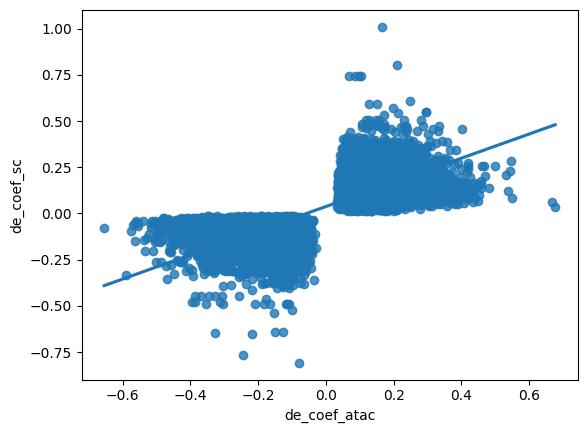

In [148]:
sns.regplot(data=df_degdar, x='de_coef_atac', y='de_coef_sc')

In [134]:
for ctname in df_degdar.ctname.unique():
    df_ct = df_degdar[df_degdar.ctname == ctname]
    corr = df_ct[['de_coef_atac', 'de_coef_sc']].corr().iloc[0, 1]
    print(f'Correlation for {ctname}: {corr:.2f}, size: {len(df_ct)}')

Correlation for PFC_Glut: 0.26, size: 4064
Correlation for PFC_GABA: 0.69, size: 552
Correlation for HIP_GABA: 0.00, size: 1113
Correlation for HIP_Glut: 0.71, size: 3079
Correlation for AMY_Glut: 0.74, size: 2883
Correlation for AMY_GABA: 0.25, size: 2913


In [149]:
 df_degdar[df_degdar.ctname == "PFC_GABA"]

,names,tx_atac,de_coef_atac,de_se_atac,de_pval_atac,dv_coef_atac,dv_se_atac,dv_pval_atac,ctname,region_atac,...,tx_sc,de_coef_sc,de_se_sc,de_pval_sc,dv_coef_sc,dv_se_sc,dv_pval_sc,de_pval_adj,gender,region_sc
139,chrX:143482812-143483313,stim,0.666049,0.088365,6.634116e-14,-1.023661,0.379092,0.004725,PFC_GABA,PFC,...,stim,0.063625,0.026470,2.147838e-02,0.072768,0.083900,0.467812,5.636378e-02,M,PFC
140,chr18:40308019-40308520,stim,0.437977,0.068180,1.032641e-10,0.243476,0.178265,0.158580,PFC_GABA,PFC,...,stim,0.165686,0.026442,1.232034e-09,-0.156156,0.058654,0.006561,2.899554e-08,M,PFC
141,chr17:39845723-39846224,stim,0.213825,0.036687,5.924013e-09,-0.223175,0.200034,0.256105,PFC_GABA,PFC,...,stim,0.177649,0.056193,1.726630e-03,-0.131046,0.232303,0.499624,7.307664e-03,M,PFC
142,chr17:39845182-39845683,stim,0.212295,0.037848,1.972041e-08,-0.177992,0.149615,0.237606,PFC_GABA,PFC,...,stim,0.177649,0.056193,1.726630e-03,-0.131046,0.232303,0.499624,7.307664e-03,M,PFC
143,chr17:39844552-39845053,stim,0.154400,0.035397,1.718953e-05,-0.381718,0.147841,0.008301,PFC_GABA,PFC,...,stim,0.177649,0.056193,1.726630e-03,-0.131046,0.232303,0.499624,7.307664e-03,M,PFC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,chr7:4149098-4149599,stim,-0.107640,0.053661,4.776084e-02,-0.193396,0.173915,0.285263,PFC_GABA,PFC,...,stim,-0.158159,0.053236,2.550204e-03,0.030679,0.192676,0.663643,9.978286e-03,M,PFC
687,chr11:59191675-59192176,stim,-0.081426,0.040678,4.814048e-02,-0.064352,0.145311,0.739277,PFC_GABA,PFC,...,stim,-0.193597,0.068393,4.039366e-03,-0.040797,0.215501,0.997256,1.452210e-02,M,PFC
688,chr9:37552527-37553028,stim,-0.177076,0.088756,4.831294e-02,0.234298,0.242506,0.307401,PFC_GABA,PFC,...,stim,-0.461887,0.032435,2.606225e-46,0.338470,0.113231,0.002004,2.358055e-43,M,PFC
689,chr1:42694113-42694614,stim,-0.187807,0.094592,4.862636e-02,-0.199293,0.277979,0.500828,PFC_GABA,PFC,...,stim,-0.197825,0.052344,1.063121e-04,0.103083,0.123420,0.504983,7.021084e-04,M,PFC


In [124]:
df_degdar.loc[df_degdar.ctname=='PFC_GABA',['de_coef_atac','de_coef_sc']].corr()

,de_coef_atac,de_coef_sc
de_coef_atac,1.000000,0.688813
de_coef_sc,0.688813,1.000000


In [115]:
df_degdar.loc[df_degdar.region_atac=='HIP',['de_coef_atac','de_coef_sc']].corr()

,de_coef_atac,de_coef_sc
de_coef_atac,1.000000,0.682958
de_coef_sc,0.682958,1.000000


In [116]:
df_degdar.loc[df_degdar.region_atac=='AMY',['de_coef_atac','de_coef_sc']].corr()

,de_coef_atac,de_coef_sc
de_coef_atac,1.000000,0.656971
de_coef_sc,0.656971,1.000000


In [125]:
df_degdar_ht.loc[df_degdar_ht.region_atac=='AMY',['de_coef_atac','de_coef_sc']].corr()

,de_coef_atac,de_coef_sc
de_coef_atac,1.000000,0.746445
de_coef_sc,0.746445,1.000000


In [120]:
df_degdar_ht.loc[df_degdar_ht.region_atac=='HIP',['de_coef_atac','de_coef_sc']].corr()

,de_coef_atac,de_coef_sc
de_coef_atac,1.00000,0.54248
de_coef_sc,0.54248,1.00000


In [90]:
df_degdar_ht.corr(method='pearson')

/tmp/ipykernel_1286213/2482177840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_degdar_ht.corr(method='pearson')


,de_coef_atac,de_se_atac,de_pval_atac,dv_coef_atac,dv_se_atac,dv_pval_atac,gstart,gend,distance,de_coef_sc,de_se_sc,de_pval_sc,dv_coef_sc,dv_se_sc,dv_pval_sc,de_pval_adj
de_coef_atac,1.000000,0.565833,-0.318975,0.110364,0.521352,-0.016617,-0.011157,-0.010662,0.001716,0.319297,0.245404,0.056605,0.040153,0.276262,0.034563,0.103237
de_se_atac,0.565833,1.000000,0.163610,0.139360,0.911770,0.013806,0.011124,0.011539,0.004586,0.263648,0.519274,0.139730,0.039270,0.545001,0.051702,0.242805
de_pval_atac,-0.318975,0.163610,1.000000,-0.001141,0.164126,0.014117,0.013575,0.013426,0.003781,0.040239,0.150436,0.032452,-0.007021,0.144149,-0.007498,0.061421
dv_coef_atac,0.110364,0.139360,-0.001141,1.000000,0.032525,-0.077513,0.005853,0.006159,0.008714,0.050776,0.022664,-0.005842,-0.001120,0.022149,-0.009285,0.002060
dv_se_atac,0.521352,0.911770,0.164126,0.032525,1.000000,0.033052,0.011878,0.011918,0.002459,0.298931,0.600044,0.166003,0.020516,0.653858,0.074910,0.281052
dv_pval_atac,-0.016617,0.013806,0.014117,-0.077513,0.033052,1.000000,-0.005825,-0.005936,0.000670,0.028348,0.031556,0.007761,-0.002904,0.044271,0.005805,0.017305
gstart,-0.011157,0.011124,0.013575,0.005853,0.011878,-0.005825,1.000000,0.999970,0.011087,0.022685,0.020429,0.015019,-0.004343,0.028938,0.009636,0.012857
gend,-0.010662,0.011539,0.013426,0.006159,0.011918,-0.005936,0.999970,1.000000,0.011205,0.022051,0.018415,0.014344,-0.004494,0.027140,0.008388,0.012193
distance,0.001716,0.004586,0.003781,0.008714,0.002459,0.000670,0.011087,0.011205,1.000000,-0.004690,-0.007876,-0.006620,-0.005155,-0.008685,-0.004975,-0.006599
de_coef_sc,0.319297,0.263648,0.040239,0.050776,0.298931,0.028348,0.022685,0.022051,-0.004690,1.000000,0.452981,-0.177102,0.061787,0.383606,0.021178,-0.128718


In [88]:
df_degdar.corr(method='pearson')

/tmp/ipykernel_1286213/1646517094.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_degdar.corr(method='pearson')


,de_coef_atac,de_se_atac,de_pval_atac,dv_coef_atac,dv_se_atac,dv_pval_atac,gstart,gend,distance,de_coef_sc,de_se_sc,de_pval_sc,dv_coef_sc,dv_se_sc,dv_pval_sc,de_pval_adj
de_coef_atac,1.000000,0.403351,0.234119,0.223262,0.450956,0.016874,0.031846,0.031132,0.000455,0.773789,0.230502,0.008499,-0.138771,0.221637,0.103319,0.043538
de_se_atac,0.403351,1.000000,0.331881,0.164879,0.913978,-0.009592,0.030013,0.030359,-0.002579,0.251545,0.479463,0.095063,-0.017120,0.497508,0.047217,0.205903
de_pval_atac,0.234119,0.331881,1.000000,0.052265,0.329997,0.018078,0.016089,0.015921,-0.020004,0.224271,0.149081,-0.001189,-0.031800,0.144520,0.036642,0.025772
dv_coef_atac,0.223262,0.164879,0.052265,1.000000,0.138509,-0.076850,0.022598,0.022477,0.014662,0.157983,0.056181,-0.002555,-0.030917,0.059751,0.018695,0.007296
dv_se_atac,0.450956,0.913978,0.329997,0.138509,1.000000,0.008297,0.025486,0.025439,-0.005572,0.308551,0.546858,0.110696,-0.038288,0.591626,0.080220,0.226365
dv_pval_atac,0.016874,-0.009592,0.018078,-0.076850,0.008297,1.000000,-0.009100,-0.009177,0.001463,0.019889,0.011227,-0.006424,0.006351,0.015718,0.006434,-0.004236
gstart,0.031846,0.030013,0.016089,0.022598,0.025486,-0.009100,1.000000,0.999977,-0.018379,0.029763,0.027635,0.005220,0.017887,0.028069,0.011455,0.004104
gend,0.031132,0.030359,0.015921,0.022477,0.025439,-0.009177,0.999977,1.000000,-0.018282,0.029320,0.025759,0.004697,0.018362,0.026231,0.010126,0.003610
distance,0.000455,-0.002579,-0.020004,0.014662,-0.005572,0.001463,-0.018379,-0.018282,1.000000,0.017709,-0.025553,-0.010769,-0.013762,-0.014898,-0.011585,-0.009377
de_coef_sc,0.773789,0.251545,0.224271,0.157983,0.308551,0.019889,0.029763,0.029320,0.017709,1.000000,0.189370,-0.073710,-0.072705,0.165496,0.059960,-0.061202


In [ ]:
sns.countplot(data=df_degdar, y='ctname', hue='condition', palette=['#FF7F0E','#1F77B4'],hue_order=['MW','MC'])


In [ ]:
df_degdar['coefsq'] = df_degdar['de_coef_atac']*df_degdar['de_coef_sc']

In [ ]:
df_degdar.sort_values(by=['coefsq']).to_csv('/data2st1/junyi/output/atac0416/dar/region_nt/df_degdar.csv',index=False)

In [ ]:
out_dir ='/data2st1/junyi/output/atac0416/dar/motif/region_nt'
for ct in df_inner['ctname'].unique():
    for condition in df_inner['condition'].unique():
        df_sub = df_inner[(df_inner['ctname'] == ct) & (df_inner['condition'] == condition)]
        if len(df_sub) == 0:
            continue
        df_sub["names"].str.split(r'[:-]', expand=True).to_csv(f'{out_dir}/{ct}_{condition}_inner.bed', sep='\t', header=False, index=False)


In [ ]:
out_dir ='/data2st1/junyi/output/atac0416/dar/motif/region_nt'
for ct in df_DAR_mememto['ctname'].unique():
    for condition in df_inner['condition'].unique():
        df_sub = df_inner[(df_inner['ctname'] == ct) & (df_inner['condition'] == condition)]
        if len(df_sub) == 0:
            continue
        df_sub["names"].str.split(r'[:-]', expand=True).to_csv(f'{out_dir}/{ct}_{condition}_memento.bed', sep='\t', header=False, index=False)


In [ ]:
files = glob.glob('/data2st1/junyi/output/atac0416/dar/motif/region_nt/*_inner.bed')
for filename in files:
    command_str = ['pycistarget','cistarget','--cistarget_db_fname','/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather'
                   ,'--bed_fname',filename,'--species','mus_musculus','--auc_threshold','0.005','--nes_threshold','3.0','--rank_threshold','0.05'
                   ,'--path_to_motif_annotations','/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl'
                   ,'--output_folder','/data2st1/junyi/output/atac0416/dar/motif/region_nt/','--write_html']
    print(command_str)
    subprocess.run(command_str)

In [ ]:
files = glob.glob('/data2st1/junyi/output/atac0416/dar/motif/region_nt/*_memento.bed')
for filename in files:
    command_str = ['pycistarget','cistarget','--cistarget_db_fname','/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather'
                   ,'--bed_fname',filename,'--species','mus_musculus','--auc_threshold','0.005','--nes_threshold','3.0','--rank_threshold','0.05'
                   ,'--path_to_motif_annotations','/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl'
                   ,'--output_folder','/data2st1/junyi/output/atac0416/dar/motif/region_nt/','--write_html']
    print(command_str)
    subprocess.run(command_str)

In [ ]:
ax = sns.countplot(data=df_DAR_mememto, x='ctname', hue='condition', dodge=False, palette='Set2',)
plt.ylim(0, 5000)


In [ ]:
for ct in df_inner['ctname'].unique():
    for condition in df_inner['condition'].unique():
        try:
            flist = glob.glob(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/*{ct}*{condition}*_inner.hdf5')
            df_report = utils.conclude_pycistargets(flist)  
            df_report_annotation = utils.annotate_region(df_report,region_col='region', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')
            df_report_annotation.to_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/{ct}_{condition}_inner_region_TF.csv', index=False)
        except Exception as e:
            print(f"Error processing {ct} and {condition}: {e}")


In [ ]:
df_join_all_TFs = pd.DataFrame()
for ct in df_DAR_mememto['ctname'].unique():
    for condition in df_DAR_mememto['condition'].unique():
        try:
            #flist = glob.glob(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/*{ct}*{condition}*_memento.hdf5')
            #df_report = utils.conclude_pycistargets(flist)  
            #df_report_annotation = utils.annotate_region(df_report,region_col='region', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')
            #df_report.to_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/{ct}_{condition}_memento_TF.csv', index=False)
            df_test= pd.read_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/{ct}_{condition}_memento_TF.csv')
            df_test['TFs'] = df_test['TFs'].str.replace(r'["\'}{}]|,?\s*nan\s*,?', '', regex=True).str.replace(r' ', '', regex=True).str.strip(",")
            df_join_TFs=df_test[['region','TFs']].groupby(['region']).aggregate(
                lambda x: "/".join(                        # Join aggregated values with '/'
                    sorted(
                        set(                                          # Keep unique values
                            item for sublist in x.str.split(",")      # Split each string by '.'
                            for item in sublist                       # Flatten the split lists
                        )# Remove empty strings
                    )
                )
            ).reset_index()
            df_join_TFs["TFs"]=df_join_TFs.TFs.str.strip('/')

            df_join_TFs["motifs"]=df_test[['region','motif']].groupby(['region']).aggregate(
                lambda x:'/'.join(x)
            ).reset_index()["motif"]
            df_join_TFs["ctname"]="_".join(df_test.key[0].split('_')[:2])
            df_join_TFs["condition"] = df_test.key[0].split('_')[2]
            df_join_TFs["method"] = df_test.key[0].split('_')[3]
            df_join_all_TFs = pd.concat([df_join_all_TFs, df_join_TFs], axis=0, ignore_index=True)
            #df_join_TFs.to_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/{ct}_{condition}_memento_TF_join.csv', index=False)


        except Exception as e:
            print(f"Error processing {ct} and {condition}: {e}")


In [ ]:
df_join_all_TFs

In [ ]:
df_annotated_TFs = utils.annotate_region(df_join_all_TFs,region_col='region', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [ ]:
df_annotated_TFs['brain_region'] = df_annotated_TFs['ctname'].str.split(r'[_]').str[0]

In [ ]:
df_annotated_TFs.to_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/motif_memento_TFs.csv', index=False)

In [ ]:
for filename in files:
    df_dar  = pd.read_csv(filename,index_col=0)
    experimentname = re.split(r'[./]', filename)[-2]
    experimentname
    folder_name = os.path.dirname(filename)
    df_dar_filtered = df_dar[(df_dar['pvals']<0.05) & (df_dar['logfoldchanges']>0) ]
    df_dar_filtered.sort_values(by='logfoldchanges',ascending=False,inplace=True)
    # For liftover

    temp_df = df_dar_filtered.names.str.split(r'[ ,!\-;:|]',expand=True)
    temp_df['ID'] = temp_df.index
    temp_df.to_csv(f"{folder_name}/{experimentname}_DAR.bed",header=False,index=False,sep="\t")

In [ ]:
# import subprocess
# files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR.bed')
# for filename in files:
#     experimentname = re.split(r'[./]', filename)[-2]
#     folder_name = os.path.dirname(filename)

#     #!/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed

#     command_str = f"/home/junyichen/liftOver {filename} /data2st1/junyi/mm39ToMm10.over.chain.gz {folder_name}/{experimentname}_lifted.bed {folder_name}/{experimentname}_unmap.bed"
#     print(command_str)
#     subprocess.run(command_str, shell=True)

In [ ]:
import subprocess

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR_lifted.bed')
for filename in files:
    destname = filename.replace("_lifted.bed","_lifted_sorted.bed")
    #!sort -k1,1 -k2,2n {filename} > {destname}
    command_str = f"sort -k1,1 -k2,2n {filename} > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)

In [ ]:
# !sort -k1,1 -k2,2n /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_lifted.bed > /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed

In [ ]:
# !sort -k1,1 -k2,2n /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted.bed > /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed

In [ ]:
# !bedtools closest -a /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_gene.bed

In [ ]:
# !bedtools closest -a /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_gene.bed

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR_lifted.bed')
for filename in files:
    command_str = ['pycistarget','cistarget','--cistarget_db_fname','/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather'
                   ,'--bed_fname',filename,'--species','mus_musculus','--auc_threshold','0.005','--nes_threshold','3.0','--rank_threshold','0.05'
                   ,'--path_to_motif_annotations','/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl'
                   ,'--output_folder','/data2st1/junyi/output/motif/','--write_html']
    print(command_str)
    subprocess.run(command_str)
    
# !pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
# --bed_fname '/data2st1/junyi/output/motif/AMY_Neuron_MC_wilcoxon_DAR_lifted.bed' \
# --species 'mus_musculus' \
# --auc_threshold 0.005 \
# --nes_threshold 3.0 \
# --rank_threshold 0.05 \
# --path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
# --output_folder '/data2st1/junyi/output/motif/' \
# --write_html 

In [ ]:
import h5py
dict_table = {}
cell_types = ['Neuron','Astro-Epen','Vascular','Immune','OPC-Oligo']
for celltype in cell_types:
    with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_ALL_{celltype}_wilcoxon_DAR_lifted.hdf5', 'r') as f:
        # Open the HDF5 file
        # List all groups and datasets in the file
        print("Keys in the file:", list(f.keys()))
        

        # # Access a specific dataset
        expname = f'ALL_{celltype}_wilcoxon_DAR_lifted'
        dataset = f[expname]  # Replace with your dataset name
        # print("Shape of the dataset:", dataset.shape)
        # print("Data type of the dataset:", dataset.dtype)
        dict_dataset = {}
        #region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][0:10]

        table = f[expname]['motif_enrichment']['table'][:]
        for key in dataset.keys():
            dict_dataset[key] = dataset[key]
        # print("Data:", data)
        dict_table[expname] = table

In [ ]:
for keys in dict_table.keys():
    print(keys)
    print(dict_table[keys][:5])
    #Astro : id, orthology, direcrt, id, msimilarity,logo
    #Neuron : id,logo,orthology, id, direct, msimilarity
    #Vascular : id,logo,orthology,msimilarity,id, direct

In [ ]:
list_table = []
list_key = []
list_TFs = []

df_TF_celltype = pd.DataFrame()

for key in dict_table.keys():
    data = dict_table[key]
    for row in data:
        list_table.append(row[0].decode('utf-8'))
        list_key.append(key)
        TFs_tmp=[]
        for i in range(1, len(row)-2):
            if 'img' in row[i][0].decode('utf-8') or 'wilcoxon' in row[i][0].decode('utf-8'):
                continue
            TFs_tmp+=([ tf.decode('utf-8') for tf in row[i]])

        df_tfs = pd.DataFrame({'TF':",".join(TFs_tmp).split(',')})
        df_tfs['NES'] = row[-2][0]
        df_tfs['AUC'] = row[-2][1]
        df_tfs['Rank'] = row[-2][2]
        df_tfs['celltype.L1'] = key.split('_')[1]
        df_tfs['id'] = row[0].decode('utf-8')

        list_TFs.append(set(TFs_tmp))
        df_TF_celltype = pd.concat([df_TF_celltype,df_tfs],axis=0)
        
df_TF = pd.DataFrame({'TF':list_table,'key':list_key,'TFs':list_TFs})

In [ ]:
df_TF_celltype.drop_duplicates(inplace=True)


In [ ]:
df_TF_celltype

In [ ]:
df_RSS = pd.read_csv("/home/junyichen/code/scmmd/data/RSS_Score(only pos).csv",index_col=0)

In [ ]:
df_RSS['TF']=df_RSS['Topic'].str.replace('[()+]','')

In [ ]:
cell_to_category = {
    # Astro-Epen
    'Astro-Gfaphigh': 'Astro-Epen',
    'Astro-TE': 'Astro-Epen',
    
    # Immune
    'Microglia': 'Immune',
    'PVM': 'Immune',
    
    # Neuron
    'L2/3 IT': 'Neuron',
    'L4/5 IT': 'Neuron',
    'L5 ET': 'Neuron',
    'L6 CT': 'Neuron',
    'L6 IT': 'Neuron',
    'L6b': 'Neuron',
    'Lamp5 GABA': 'Neuron',
    'Pvalb GABA': 'Neuron',
    'Pvalb Vipr2 GABA': 'Neuron',
    'Sst GABA': 'Neuron',
    'Vip GABA': 'Neuron',
    
    # OPC-Oligo
    'COP': 'OPC-Oligo',
    'MFOL': 'OPC-Oligo',
    'MOL': 'OPC-Oligo',
    'NFOL': 'OPC-Oligo',
    'NP': 'OPC-Oligo',
    'OPC': 'OPC-Oligo',
    
    # Vascular
    'Arachnoid barrier cell': 'Vascular',
    'Car3': 'Vascular',
    'Endothelial cell': 'Vascular',
    'Pericyte': 'Vascular',
    'VLMC': 'Vascular'
}

In [ ]:
df_RSS['celltype.L1'] = df_RSS['celltype.L2'].map(cell_to_category)


In [ ]:
df_TF_celltype.groupby(['celltype.L1']).nunique()

In [ ]:
df_RSS.groupby(['celltype.L1']).nunique()

In [ ]:
df_merged = df_RSS.merge(df_TF_celltype,left_on=['TF','celltype.L1'],right_on=['TF','celltype.L1'],how='inner')

In [ ]:
df_merged.sort_values(by='RSS',ascending=False,inplace=True)

In [ ]:
df_merged.drop_duplicates(set(['TF','celltype.L1']),keep='first').to_csv('/data2st1/junyi/output/motif/TF_RSS.csv',index=False)

In [ ]:
df_merged.groupby('celltype.L1').nunique()

In [ ]:
ct = pd.crosstab(df_merged['celltype'],df_merged['celltype.L1'],values=df_merged['RSS'],aggfunc='count')

In [ ]:
ct

In [ ]:
set(df_merged['celltype']
)

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR_lifted_sorted.bed')
for filename in files:
    destname = filename.replace("_lifted_sorted.bed","_lifted_sorted_gene.bed")
    command_str = f"bedtools closest -a {filename} -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)
# !bedtools closest -a /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_gene.bed

In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/AMY_Neuron_MC_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html 

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon.csv')
for filename in files:
    df_dar  = pd.read_csv(filename,index_col=0)
    experimentname = re.split(r'[./]', filename)[-2]
    experimentname
    folder_name = os.path.dirname(filename)
    df_dar_filtered = df_dar[(df_dar['pvals']<0.05) & (df_dar['logfoldchanges']>0) ]
    df_dar_filtered.sort_values(by='logfoldchanges',ascending=False,inplace=True)
    # For liftover
    df_dar_filtered.names.str.split(r'[ ,!\-;:|]',expand=True).to_csv(f"{folder_name}/{experimentname}_DAR.bed",header=False,index=False,sep="\t")

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR.bed')
for filename in files:
    experimentname = re.split(r'[./]', filename)[-2]
    folder_name = os.path.dirname(filename)

    #!/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed

    command_str = f"/home/junyichen/liftOver {filename} /data2st1/junyi/mm39ToMm10.over.chain.gz {folder_name}/{experimentname}_lifted.bed {folder_name}/{experimentname}_unmap.bed"
    print(command_str)
    subprocess.run(command_str, shell=True)

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR_lifted.bed')
for filename in files:
    destname = filename.replace("_lifted.bed","_lifted_sorted.bed")
    #!sort -k1,1 -k2,2n {filename} > {destname}
    command_str = f"sort -k1,1 -k2,2n {filename} > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR_lifted_sorted.bed')
for filename in files:
    destname = filename.replace("_lifted_sorted.bed","_lifted_sorted_gene.bed")
    command_str = f"bedtools closest -a {filename} -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)

In [ ]:
# from pyliftover import LiftOver
# lo = LiftOver('/data2st1/junyi/mm10ToMm39.over.chain.gz')
# lo.convert_coordinate('chr1', 1000000, '-')


In [ ]:
result_frame = pd.DataFrame()
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR_lifted_sorted_gene.bed')
for filename in files:
    experimentname = re.split(r'[./]', filename)[-2]
    region = re.split(r'_',experimentname)[0]
    celltype = re.split(r'_',experimentname)[1]
    condition = re.split(r'_',experimentname)[2]
    try:
        df = pd.read_csv(filename,sep='\t',header=None)
    except:
        continue
    df.columns = ['chrom','start','end','chrom2','start2','end2','score','starnd','gene_name','gene_id','annotation','distance']
    df['region'] = region
    df['celltype'] = celltype
    df['condition'] = condition
    df['name'] = df['chrom'] + ':' + df['start'].astype(str) + '-' + df['end'].astype(str)
    # df_score = pd.read_csv(f"/data2st1/junyi/output/motif/{region}_{celltype}_{condition}_wilcoxon.csv",index_col=0)
    # df['logfoldchanges'] = df_score.set_index('names').loc[df['name'],'logfoldchanges'].values
    # df['pvals'] = df_score.set_index('names').loc[df['name'],'pvals'].values
    result_frame = pd.concat([result_frame,df])

In [ ]:
ax = sns.countplot(data=result_frame, x='celltype', hue='region', dodge=False, palette='Set2',)
ax.set_ylim(0,6000)


In [ ]:
keep1=result_frame.sort_values(by='starnd',ascending=True).drop_duplicates(subset=['chrom','start','end'])
keep1['generegion'] = 'genebody'
#keep1.loc[keep1['distance']<0,'generegion'] = 'downstream'
promoter = keep1.loc[(keep1['distance']>0) & (keep1['distance']<=2000) & (keep1['starnd']=='+')].index
distal = keep1.loc[(keep1['distance']>0) & (keep1['distance']>=2000) & (keep1['starnd']=='+')].index
keep1.loc[promoter,'generegion'] = 'promoter'
keep1.loc[distal,'generegion'] = 'distal'

promoter = keep1.loc[(keep1['distance']<0) & (keep1['distance']>=-2000) & (keep1['starnd']=='-')].index
distal = keep1.loc[(keep1['distance']<0) & (keep1['distance']<=-2000) & (keep1['starnd']=='-')].index
keep1.loc[promoter,'generegion'] = 'promoter'
keep1.loc[distal,'generegion'] = 'distal'


In [ ]:
keep1=keep1.loc[keep1['start2']>0]

In [ ]:
keep1.sort_values(by='starnd',ascending=True).drop_duplicates(subset=['chrom','start','end'])

In [ ]:
ax = sns.countplot(data=keep1, x='celltype', hue='generegion', dodge=False, palette='Set2',)

In [ ]:
pd.read_csv('/data2st1/junyi/output/motif/AMY_Neuron_MC_wilcoxon.csv',index_col=0)

In [ ]:
# Convert hg38 to hg19
# !/home/junyichen/liftOver /data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR_unmap.bed
# !/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed
# !/home/junyichen/liftOver /data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR_unmap.bed


In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html

In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html

In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html

In [ ]:
import h5py
import copy

regions = ['AMY','HIP','PFC']
celltypes = ['Neuron']

dict_table = {}

for region in regions:
    for celltype in celltypes:
        with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_{region}_{celltype}_MC_wilcoxon_DAR_lifted.hdf5', 'r') as f:
            # Open the HDF5 file
            # List all groups and datasets in the file
            print("Keys in the file:", list(f.keys()))
            

            # # Access a specific dataset
            expname = f'{region}_{celltype}_MC_wilcoxon_DAR_lifted'
            dataset = f[expname]  # Replace with your dataset name
            # print("Shape of the dataset:", dataset.shape)
            # print("Data type of the dataset:", dataset.dtype)

            dict_dataset = {}

            #region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][0:10]

            table = f[expname]['motif_enrichment']['table'][:]
            for key in dataset.keys():
                dict_dataset[key] = dataset[key]
            # print("Data:", data)
            dict_table[expname] = table

In [ ]:
for i in dict_table['AMY_Neuron_MC_wilcoxon_DAR_lifted']:
    print(i[0])

In [ ]:
region_table = {}

for region in regions:
    for celltype in celltypes:
        with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_{region}_{celltype}_MC_wilcoxon_DAR_lifted.hdf5', 'r') as f:
            # Open the HDF5 file
            # List all groups and datasets in the file
            print("Keys in the file:", list(f.keys()))
            

            # # Access a specific dataset
            expname = f'{region}_{celltype}_MC_wilcoxon_DAR_lifted'
            dataset = f[expname]  # Replace with your dataset name
            # print("Shape of the dataset:", dataset.shape)
            # print("Data type of the dataset:", dataset.dtype)

            dict_dataset = {}

            region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][:]
            region_table[expname] = region

In [ ]:
import numpy as np

list_table = []
list_key = []

for key in dict_table.keys():
    data = dict_table[key]
    for row in data:
        list_table.append(row[0])
        list_key.append(key)
df_TF = pd.DataFrame({'TF':list_table,'key':list_key})

In [ ]:
df_TF

In [ ]:
df_count = df_TF.groupby('TF').count().sort_values(by='key',ascending=False)

In [ ]:
df_count[df_count['key']>2].index

In [ ]:
df_regions = pd.DataFrame()

for region in regions:
    for celltype in celltypes:
        with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_{region}_{celltype}_MC_wilcoxon_DAR_lifted.hdf5', 'r') as f:
            # Open the HDF5 file
            # List all groups and datasets in the file
            print("Keys in the file:", list(f.keys()))
            

            # # Access a specific dataset
            expname = f'{region}_{celltype}_MC_wilcoxon_DAR_lifted'
            dataset = f[expname]  # Replace with your dataset name
            # print("Shape of the dataset:", dataset.shape)
            # print("Data type of the dataset:", dataset.dtype)


            for TF in df_count[df_count['key']>2].index:
                region = f[expname]['motif_hits']['region_set'][TF][:]
                decoded_data = [item.decode('utf-8') for item in region]
                df_region = pd.DataFrame(decoded_data,columns=['region'])
                df_region['expreiment'] = expname
                df_region['TF'] = TF.decode('utf-8')
                if len(df_regions)>0:
                    df_regions = pd.concat([df_regions,df_region],axis=0,ignore_index=True)
                else:
                    df_regions = df_region
            #region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][:]
            #region_table[expname] = df_regions

In [ ]:
df_count[df_count['key']>2].index

In [ ]:
df_regions.head(10)

In [ ]:
region_table

In [ ]:
sns.countplot(data=df_TF, x='key', dodge=False, palette='Set2',)
plt.xticks(rotation=60)


In [ ]:
for key in dict_table.keys():
    print(len(dict_table[key]))

In [ ]:
table